# Sections around the ACC

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo

import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import processing_funcs as prf

In [367]:
reload(ef);

The goal of this notebook is to take multiple sections in the Southern Ocean to see if this variance minimum appears anywhere else. I'd also like to try doing one huge section from the Southern Ocean to the North Atlantic if possible.

# Section Selection

In [63]:
box1 = [0,2,-70,0,0,2000]
box2 = [60,62,-70,20,0,2000]
box3 = [90,92,-70,15,0,2000]
box4 = [128,130,-70,-35,0,2000]
box5 = [-180,-178,-70,70,0,2000]
box6 = [-130,-128,-70,50,0,2000]
box7 = [-50,-48,-70,-35,0,2000]
box8 = [-25,-23,-70,70,0,2000]
box9 = [-10,-8,-70,0,0,2000]
boxes= [box1, box2, box3, box4, box5, box6, box7, box8, box9]

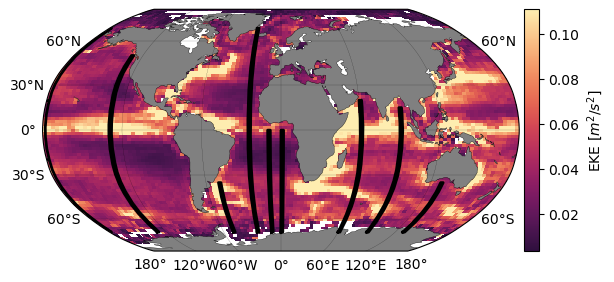

In [64]:
pf.plot_box(boxes)

In [145]:
scales = [50,100,200]
sample_max = 12
variable = 'SPICE'

In [368]:
sect1     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(0,2)_lat:(-70,0)_ds_z.nc')
sect1_EKE = ef.get_EKE_da(sect1, scales, sample_max, variable)

In [369]:
sect2     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(60,62)_lat:(-70,20)_ds_z.nc')
sect2_EKE = ef.get_EKE_da(sect2, scales, sample_max, variable)

In [370]:
sect3     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(90,92)_lat:(-70,15)_ds_z.nc')
sect3_EKE = ef.get_EKE_da(sect3, scales, sample_max, variable)

In [371]:
sect4     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(128,130)_lat:(-70,-35)_ds_z.nc')
sect4_EKE = ef.get_EKE_da(sect4, scales, sample_max, variable)

In [372]:
sect5     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-180,-178)_lat:(-70,70)_ds_z.nc')
sect5_EKE = ef.get_EKE_da(sect5, scales, sample_max, variable)

In [373]:
sect6     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-130,-128)_lat:(-70,50)_ds_z.nc')
sect6_EKE = ef.get_EKE_da(sect6, scales, sample_max, variable)

In [374]:
sect7     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-50,-48)_lat:(-70,-35)_ds_z.nc')
sect7_EKE = ef.get_EKE_da(sect7, scales, sample_max, variable)

In [375]:
sect8     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-25,-23)_lat:(-70,70)_ds_z.nc')
sect8_EKE = ef.get_EKE_da(sect8, scales, sample_max, variable)

In [376]:
sect9     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-10,-8)_lat:(-70,0)_ds_z.nc')
sect9_EKE = ef.get_EKE_da(sect9, scales, sample_max, variable)

In [155]:
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive']

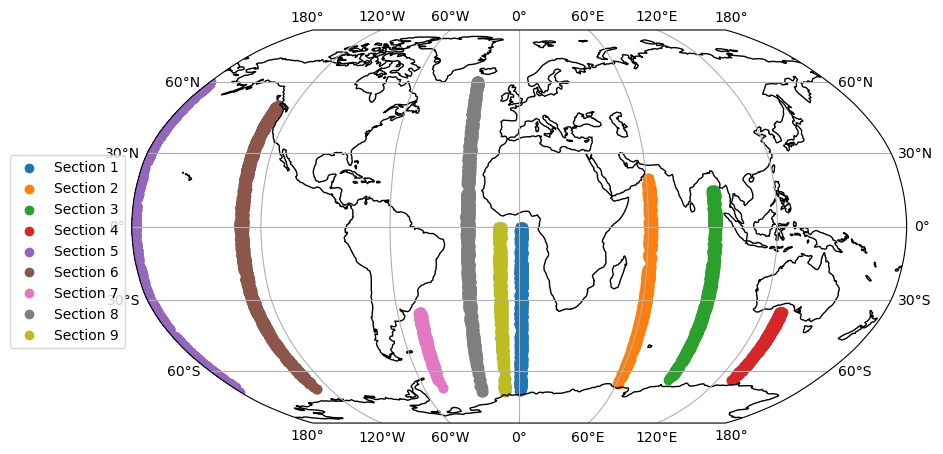

In [156]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
ax.gridlines(draw_labels=True)
#for n in range(0,len(boxes)):
#    ax.plot(posttobox(boxes[n][:2],boxes[n][2:])[0],postobox(boxes[n][:2],boxes[n][2:][1], #color=colors[n],transform=ccrs.PlateCCarree(),lw=2)

ax.scatter(sect1.LONGITUDE,sect1.LATITUDE,transform=ccrs.PlateCarree(),color=colors[0],label='Section 1')
ax.scatter(sect2.LONGITUDE,sect2.LATITUDE,transform=ccrs.PlateCarree(),color=colors[1],label='Section 2')
ax.scatter(sect3.LONGITUDE,sect3.LATITUDE,transform=ccrs.PlateCarree(),color=colors[2],label='Section 3')
ax.scatter(sect4.LONGITUDE,sect4.LATITUDE,transform=ccrs.PlateCarree(),color=colors[3],label='Section 4')
ax.scatter(sect5.LONGITUDE,sect5.LATITUDE,transform=ccrs.PlateCarree(),color=colors[4],label='Section 5')
ax.scatter(sect6.LONGITUDE,sect6.LATITUDE,transform=ccrs.PlateCarree(),color=colors[5],label='Section 6')
ax.scatter(sect7.LONGITUDE,sect7.LATITUDE,transform=ccrs.PlateCarree(),color=colors[6],label='Section 7')
ax.scatter(sect8.LONGITUDE,sect8.LATITUDE,transform=ccrs.PlateCarree(),color=colors[7],label='Section 8')
ax.scatter(sect9.LONGITUDE,sect9.LATITUDE,transform=ccrs.PlateCarree(),color=colors[8],label='Section 9')

plt.legend(bbox_to_anchor=(0,0.7))

# T, S, SIG0, EKE Sections

In [419]:
#        CT                     SA                      SIG0                    SPICE
names = [cmo.thermal,           cmo.haline,             cmo.dense,              cmo.deep]
bounds = [np.linspace(-2,22,7), np.linspace(33,36.5,8), np.linspace(24,28.5,6), np.linspace(-2,5,7)]
cmaps = []
norms = []

for n in range(0,len(names)):
    cmap = names[n]
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    norm = mpl.colors.BoundaryNorm(bounds[n], cmap.N)
    
    cmaps.append(cmap)
    norms.append(norm)

In [454]:
sect     = sect9    .sortby('LATITUDE')#.where(sect6.sample_rate<sample_max)
sect_all = sect9    .sortby('LATITUDE')
EKE      = sect9_EKE.sortby('LATITUDE').where(sect9_EKE.mask==1)

levels   = np.linspace(sect_all.isel(PRES_INTERPOLATED=slice(500,1500)).SIG0.min(),sect_all.isel(PRES_INTERPOLATED=slice(500,1500)).SIG0.max(),6)

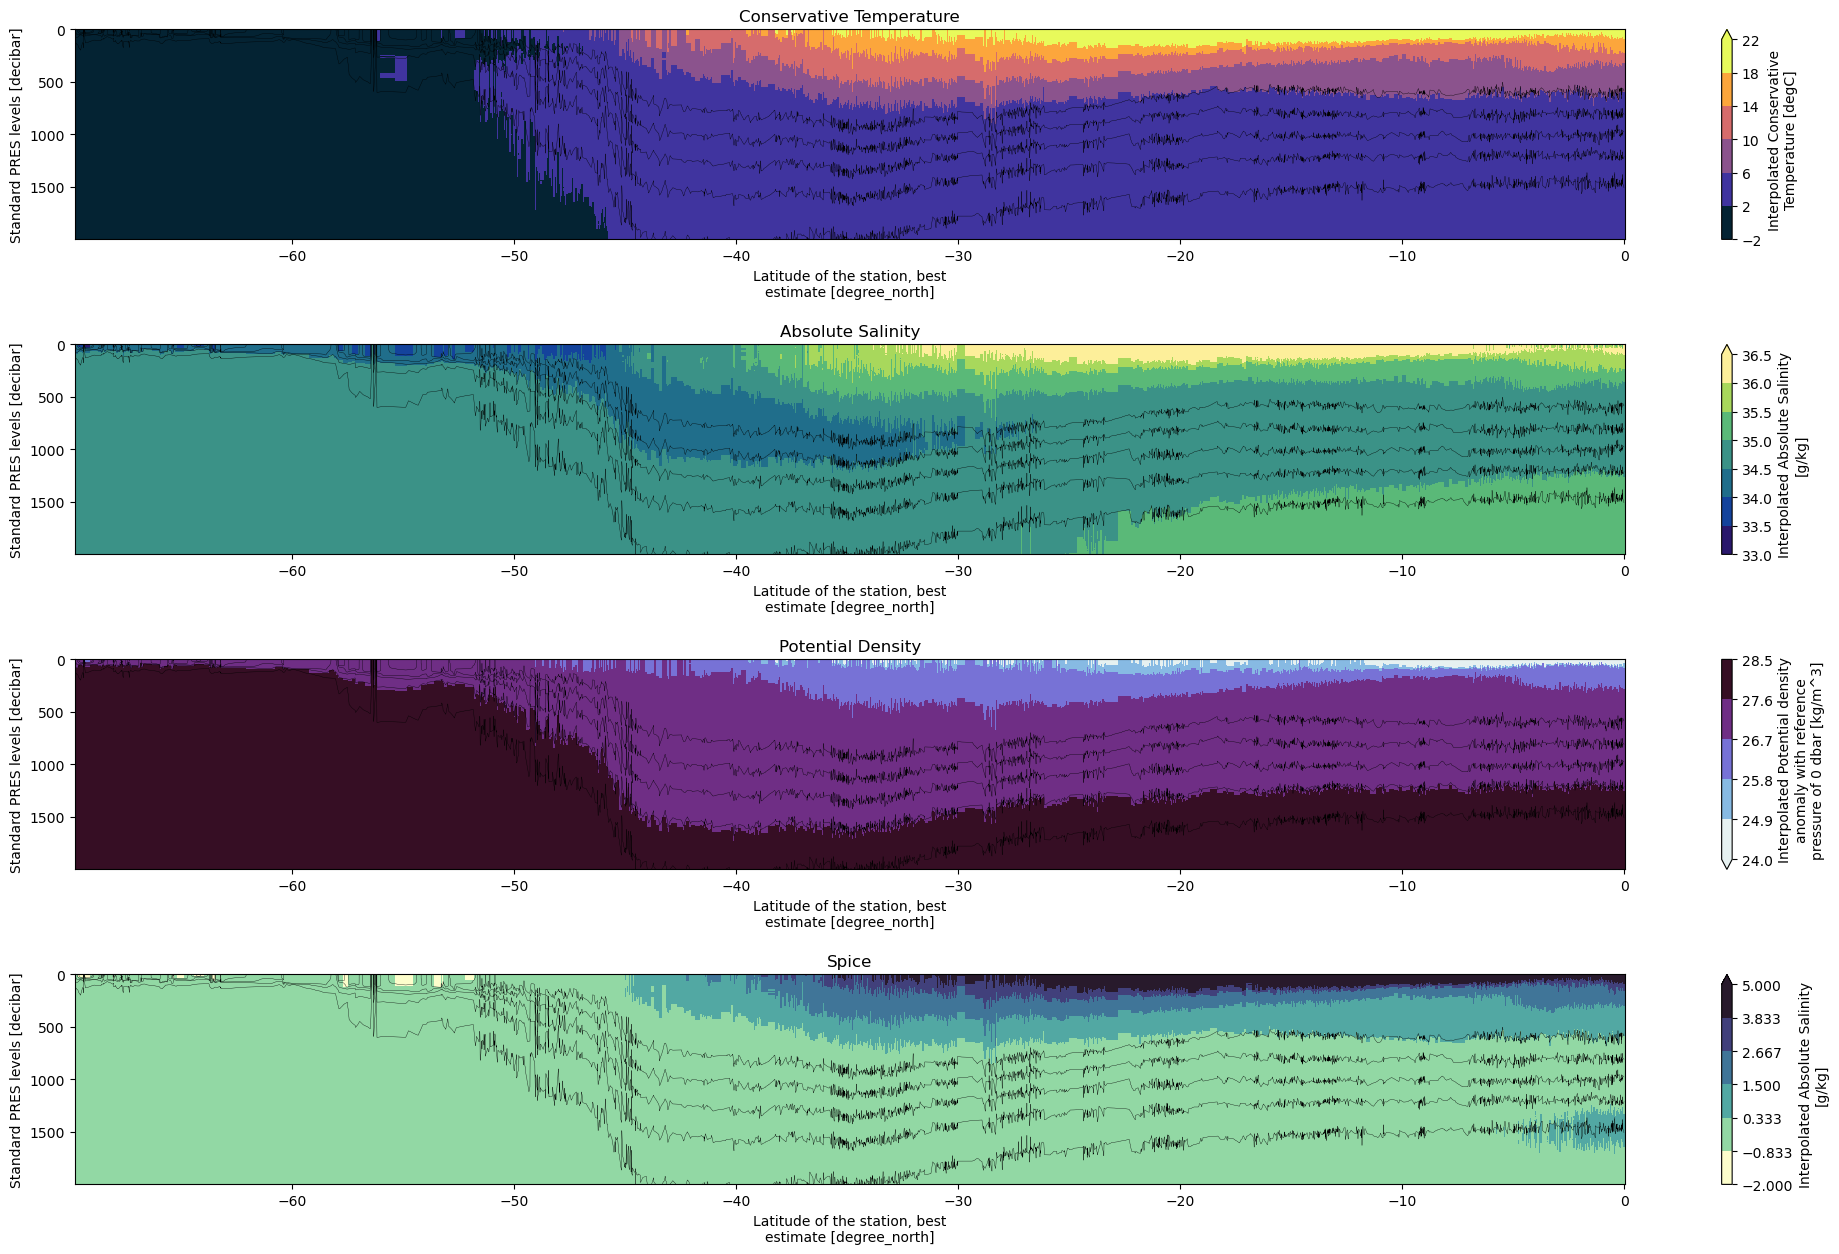

In [455]:
plt.figure(figsize=(25,15))

plt.subplot(411)
sect.CT.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[0], norm=norms[0])
sect_all.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Conservative Temperature')

plt.subplot(412)
sect.SA.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[1], norm=norms[1])
sect_all.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Absolute Salinity')

plt.subplot(413)
sect.SIG0.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[2], norm=norms[2])
sect_all.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Potential Density')

plt.subplot(414)
sect.SPICE.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[3], norm=norms[3])
sect_all.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Spice')

plt.subplots_adjust(hspace=0.5)

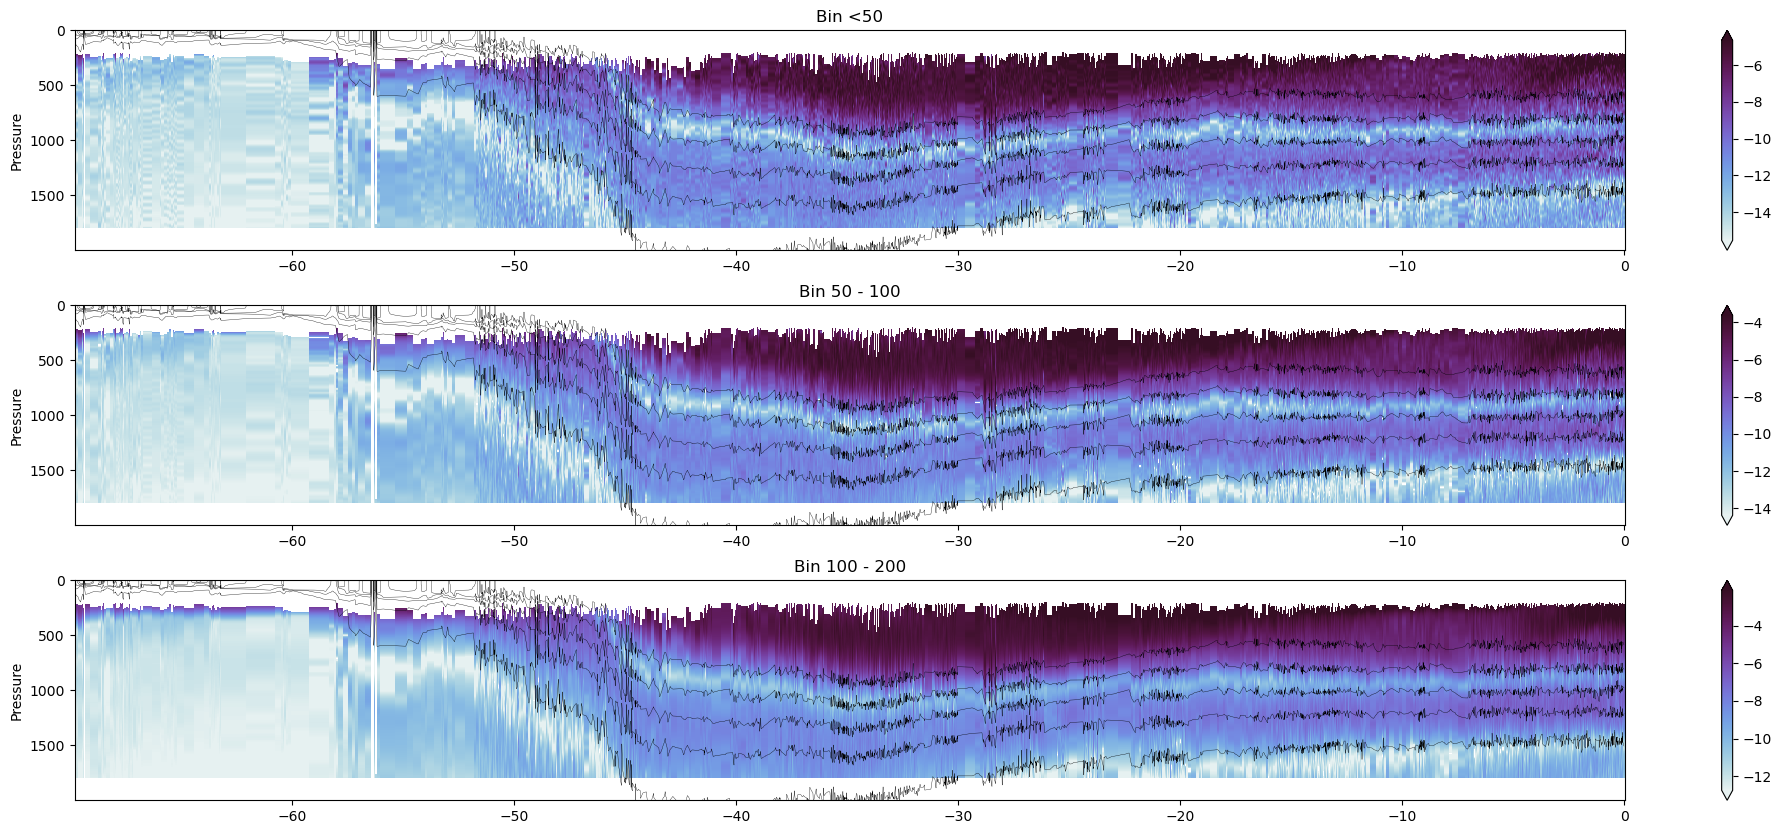

In [456]:
plt.figure(figsize=(25,10))

plt.subplot(311)
np.log(EKE.isel(EKE=0)).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect_all.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('Bin <{}'.format(scales[0]))

plt.subplot(312)
np.log(EKE.isel(EKE=1)).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect_all.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('Bin {} - {}'.format(scales[0], scales[1]))

plt.subplot(313)
np.log(EKE.isel(EKE=2)).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect_all.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels, colors='k', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('Bin {} - {}'.format(scales[1], scales[2]))

plt.subplots_adjust(hspace=0.25)